In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

In [3]:
#Grab a peak at the data
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
#exploring
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Print the shape of the data
print(data.shape)

(284807, 31)


In [6]:
# data = data.sample(frac=0.1, random_state = 48)
data.describe().T.head()

count          mean           std        min           25%  \
Time  284807.0  9.481386e+04  47488.145955   0.000000  54201.500000   
V1    284807.0  3.919560e-15      1.958696 -56.407510     -0.920373   
V2    284807.0  5.688174e-16      1.651309 -72.715728     -0.598550   
V3    284807.0 -8.769071e-15      1.516255 -48.325589     -0.890365   
V4    284807.0  2.782312e-15      1.415869  -5.683171     -0.848640   

               50%            75%            max  
Time  84692.000000  139320.500000  172792.000000  
V1        0.018109       1.315642       2.454930  
V2        0.065486       0.803724      22.057729  
V3        0.179846       1.027196       9.382558  
V4       -0.019847       0.743341      16.875344

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
data.groupby(['Time']).V3.count()

Time
0.0         2
1.0         2
2.0         2
4.0         1
7.0         2
           ..
172785.0    1
172786.0    1
172787.0    1
172788.0    2
172792.0    1
Name: V3, Length: 124592, dtype: int64

In [9]:
data.groupby(["Amount"]).V1.count()

Amount
0.00        1825
0.01         718
0.02          85
0.03           3
0.04          11
            ... 
11898.09       1
12910.93       1
18910.00       1
19656.53       1
25691.16       1
Name: V1, Length: 32767, dtype: int64

In [10]:
data['V1'].value_counts()

 2.055797    77
 1.245674    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.069327     1
-1.619420     1
 1.174923     1
 2.157306     1
 2.287784     1
Name: V1, Length: 275663, dtype: int64

In [11]:
data['V11'].value_counts()

-0.356749    77
 0.063504    77
-0.589598    62
-0.191423    60
 0.329651    53
             ..
 1.041802     1
-0.685356     1
-0.028580     1
-1.010640     1
 0.967952     1
Name: V11, Length: 275663, dtype: int64

In [12]:
data['V18'].value_counts()

-0.438992    77
-0.052640    77
-0.257786    62
 0.617970    60
-0.498850    53
             ..
-0.221214     1
-0.394483     1
-0.047950     1
 0.999119     1
 0.160657     1
Name: V18, Length: 275663, dtype: int64

In [13]:
data['V24'].value_counts()

 0.726212    77
 0.357827    77
 0.620709    62
 1.018136    60
 0.604827    53
             ..
-0.316948     1
 0.400848     1
 0.271161     1
-0.016787     1
 0.606096     1
Name: V24, Length: 275663, dtype: int64

In [14]:
data['Time'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05])

In [15]:
data['V1'].unique()

array([-1.35980713,  1.19185711, -1.35835406, ...,  1.91956501,
       -0.24044005, -0.53341252])

In [16]:
data['V2'].unique()

array([-0.07278117,  0.26615071, -1.34016307, ..., -0.30125385,
        0.53048251, -0.18973334])

In [17]:
data['V11'].unique()

array([-0.55159953,  1.61272666,  0.62450146, ...,  0.41161374,
       -1.93384882, -1.04045834])

In [18]:
data['V19'].unique()

array([ 0.40399296, -0.14578304, -2.2618571 , ..., -0.57725184,
        2.89784877, -0.25611687])

In [19]:
data['V21'].unique()

array([-0.01830678, -0.22577525,  0.24799815, ...,  0.23204504,
        0.26524492,  0.26105733])

In [20]:
data['V25'].unique()

array([ 0.12853936,  0.1671704 , -0.32764183, ...,  0.26574545,
       -0.56915886, -0.4736487 ])

In [21]:
data['V28'].unique()

array([-0.02105305,  0.01472417, -0.05975184, ..., -0.02656083,
        0.10453282,  0.01364891])

(array([10510., 16955., 38526., 38550., 40243., 10145., 17161., 38951.,
        40779., 32987.]),
 array([     0. ,  17279.2,  34558.4,  51837.6,  69116.8,  86396. ,
        103675.2, 120954.4, 138233.6, 155512.8, 172792. ]),
 <a list of 10 Patch objects>)

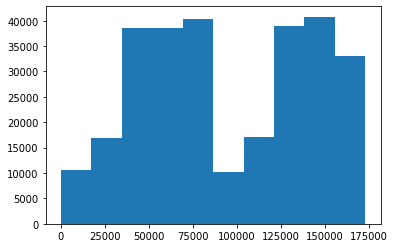

In [22]:
plt.hist(data['Time'])

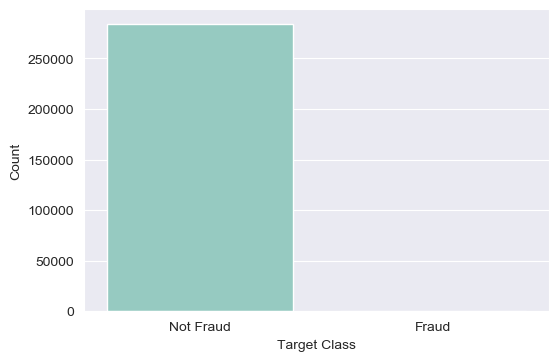

In [23]:
plt.figure(dpi=100)
sns.set_style('darkgrid')
sns.countplot(data.Class, palette="Set3")
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0,1],['Not Fraud','Fraud'])
plt.show()

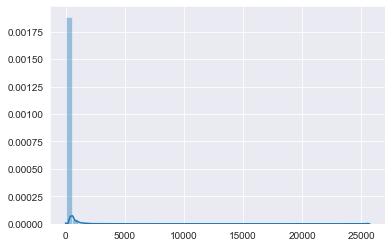

In [24]:
# distribution of Amount
amount = [data['Amount'].values]
sns.distplot(amount)

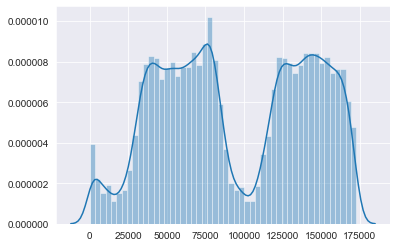

In [25]:
# distribution of Time
time = data['Time'].values
sns.distplot(time)

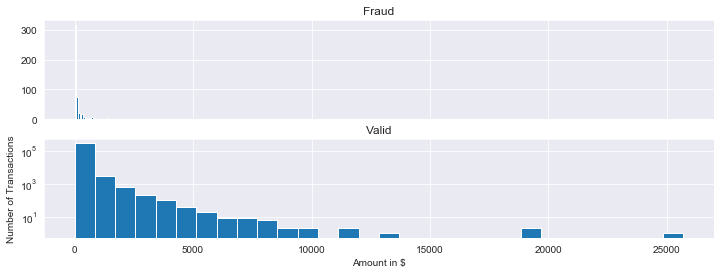

In [26]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = [12,4])

ax1.hist(data.Amount[data.Class == 1], bins = 30)
ax1.set_title("Fraud")
ax2.hist(data.Amount[data.Class == 0], bins = 30)
ax2.set_title("Valid")

plt.xlabel('Amount in $')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

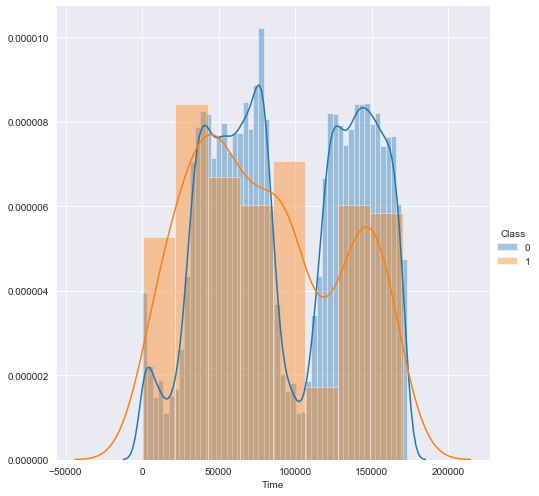

In [27]:
sns.FacetGrid(data, hue="Class", size=7).map(sns.distplot, "Time").add_legend()
plt.show()

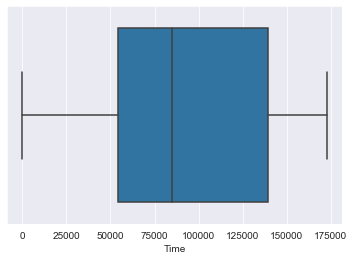

In [28]:
sns.boxplot(data['Time'])

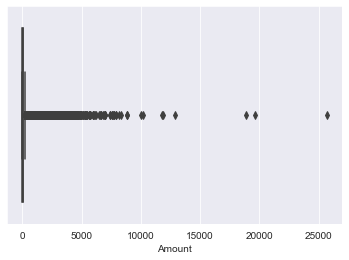

In [29]:
sns.boxplot(data['Amount'])

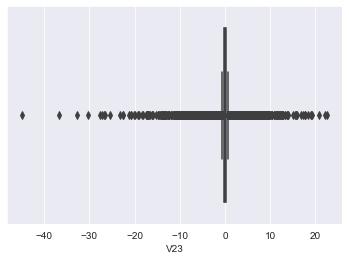

In [30]:
sns.boxplot(data['V23'])

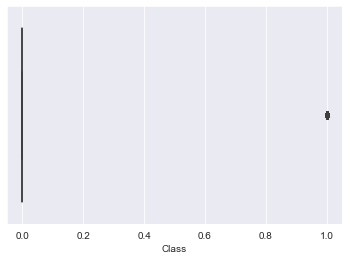

In [31]:
sns.boxplot(data['Class'])

In [32]:
data.V12.value_counts()

 0.350564    77
-0.073460    77
-0.174712    62
 0.631027    60
 0.183508    53
             ..
 1.026525     1
-0.331234     1
-0.046139     1
-1.581549     1
 0.130028     1
Name: V12, Length: 275663, dtype: int64

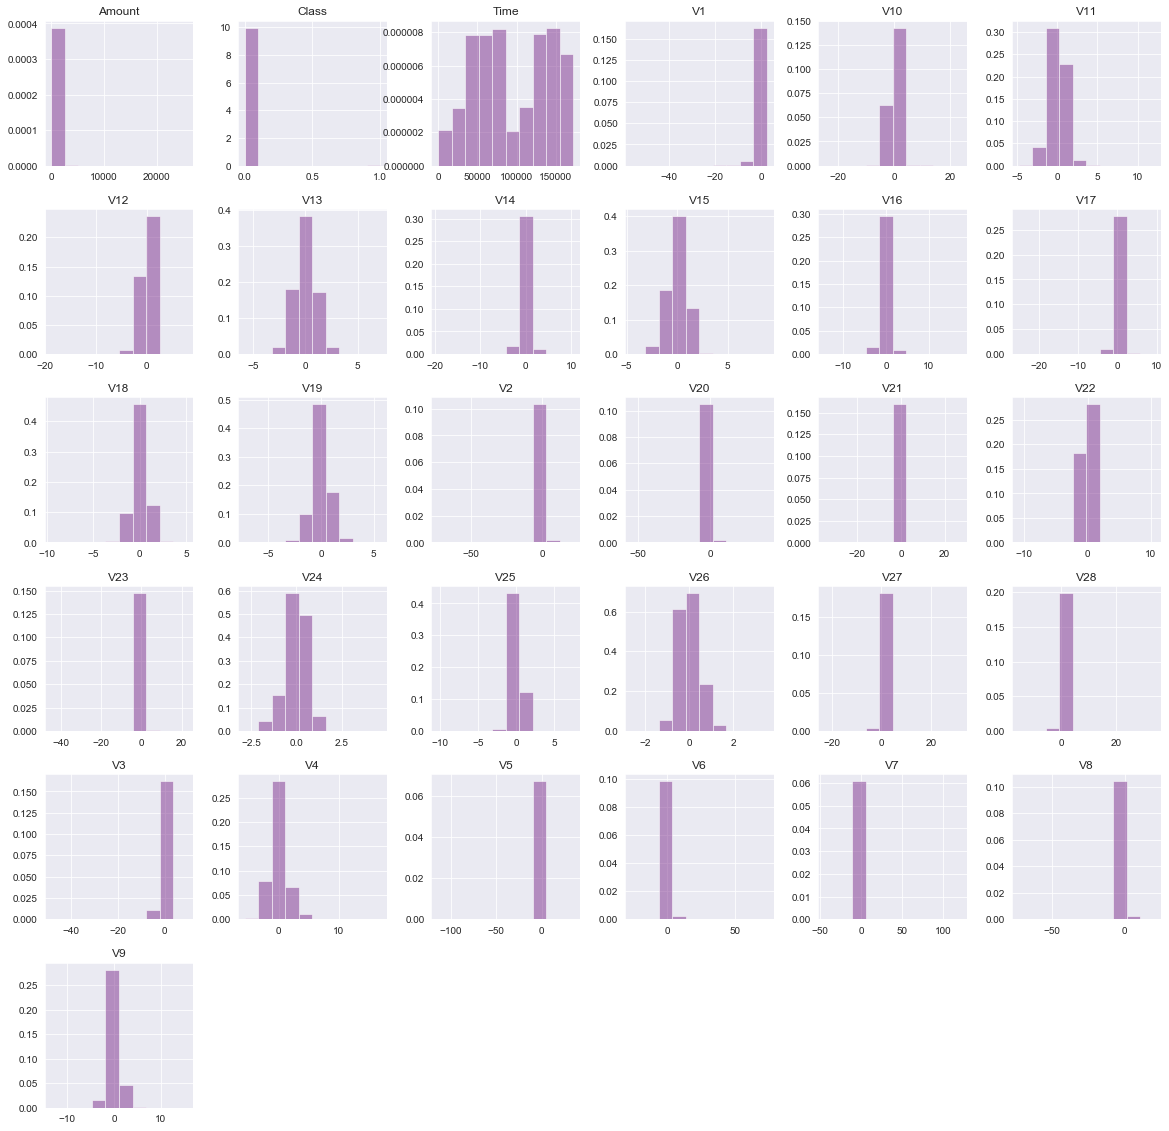

In [33]:
data.hist(figsize=(20,20),
         facecolor='#7E2F8E',
       density=True,
       alpha=0.5)
plt.show()

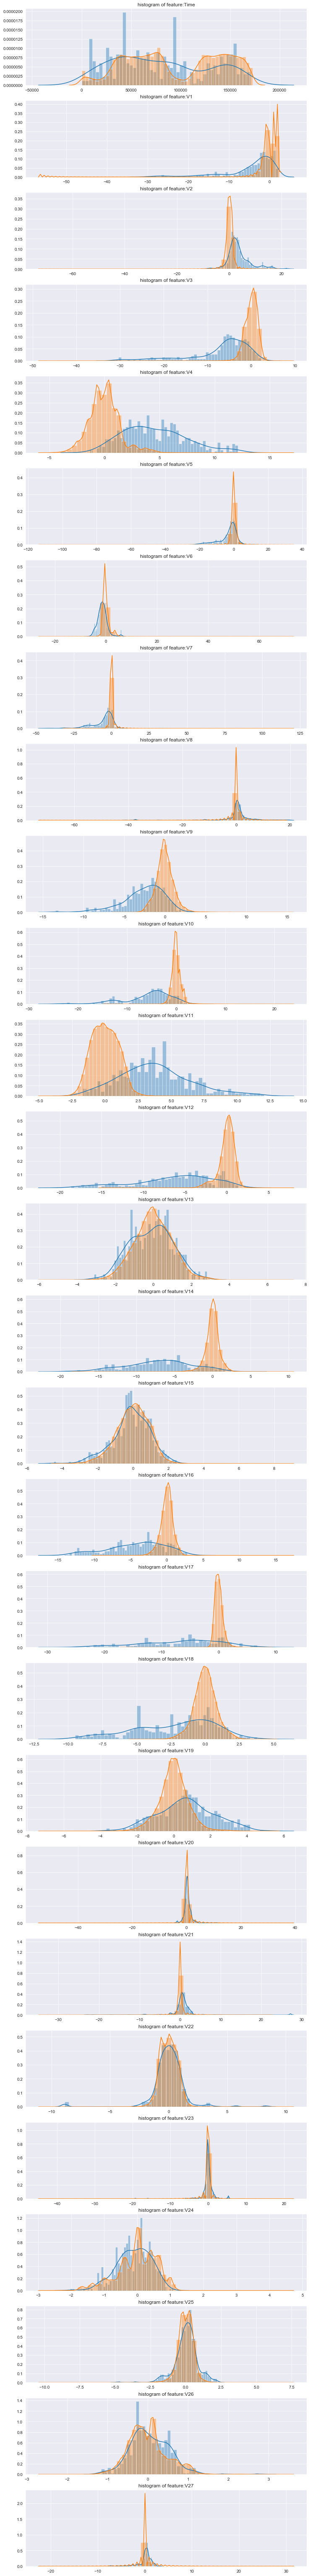

In [34]:
# distribution of anomalous features
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class == 1], bins=50)
    sns.distplot(data[c][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature:'+ str(c))
plt.show()

In [35]:
data.corr(method = 'pearson')

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.124348  2.422086e-16 -6.588252e-16  2.206522e-16 -5.657963e-16   
V13    -0.065902 -2.115458e-16  3.854521e-16 -6.883375e-16 -1.506129e-16   
V14    -0.098757  9.352582e-16 -2.541036e-16  4.271336e-16 -8.522435e-17   
V15    -0.183453 -3.252451e-16  2.831060e-16  1.122756e-16 -1.507718e-16   
V16     0.011903  6.308789e-16  4.934097e-17  1.183364e-15 -6.939204e-16   
V17    -0.073297 -5.011524e-16 -9.883008e-16  4.576619e-17 -4.397925e-16   
V18     0.090438  2.870125e-16  2.636654e-16  5.427965e-16  1.493667e-16   
V19     0.028975  1.818128e-16  9.528280e-17  2.576773e-16 -2.656938e-16   
V20    -0.050866  1.036959e-16 -9.309954e-16 -9.429297e-16 -3.223123e-16   
V21     0.044736 -1.755072e-16  8.444409e-17 -2.971969e-17 -9.976950e-17   
V22     0.144059  7.477367e-17  2.500830e-16  4.648259e-16  2.099922e-16   
V23     0.051142  9.808705e-16  1.059562e-16  2.115206e-17  6.002528e-17   
V24    -0.016182  7.354269e-17 -8.142354e-18 -9.351637e-17  2.229738e-16   
V25    -0.233083 -9.805358e-16 -4.261894e-17  4.771164e-16  5.394585e-16   
V26    -0.041407 -8.621897e-17  2.601622e-16  6.521501e-16 -6.179751e-16   
V27    -0.005135  3.208233e-17 -4.478472e-16  6.239832e-16 -6.403423e-17   
V28    -0.009413  9.820892e-16 -3.676415e-16  7.726948e-16 -5.863664e-17   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      6.391162e-17  2.398071e-16  1.991550e-15 -9.490675e-17  2.169581e-16   
V2     -2.039868e-16  5.024680e-16  3.966486e-16 -4.413984e-17 -5.728718e-17   
V3     -1.436514e-15  1.431581e-15  2.168574e-15  3.433113e-16 -4.233770e-16   
V4     -1.940929e-15 -2.712659e-16  1.556330e-16  5.195643e-16  3.859585e-16   
V5      1.000000e+00  7.926364e-16 -4.209851e-16  7.589187e-16  4.205206e-16   
V6      7.926364e-16  1.000000e+00  1.429426e-16 -1.707421e-16  1.114447e-16   
V7     -4.209851e-16  1.429426e-16  1.000000e+00 -8.691834e-17  7.933251e-16   
V8      7.589187e-16 -1.707421e-16 -8.691834e-17  1.000000e+00  2.900829e-16   
V9      4.205206e-16  1.114447e-16  7.933251e-16  2.900829e-16  1.000000e+00   
V10    -6.601716e-16  2.850776e-16  3.043333e-17  9.051847e-17 -2.771761e-16   
V11     7.342759e-16  4.865799e-16 -1.084105e-15  1.954747e-16  4.682341e-16   
V12     3.761033e-16  2.140589e-16  1.510045e-15 -6.266057e-17 -2.445230e-15   
V13    -9.578659e-16 -2.268061e-16 -9.892325e-17 -2.382948e-16 -2.650351e-16   
V14    -3.634803e-16  3.452801e-16 -1.729462e-16 -1.131098e-16  2.343317e-16   
V15    -5.132620e-16 -6.368111e-18  1.936832e-17  2.021491e-16 -1.588105e-15   
V16    -3.517076e-16 -2.477917e-16  2.893672e-16  5.027192e-16 -3.251906e-16   
V17     1.425729e-16  3.567582e-16  1.149692e-15 -3.508777e-16  6.535992e-16   
V18     1.109525e-15  2.811474e-16 -1.116789e-16 -4.093852e

In [36]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

(array([10510., 16955., 38526., 38550., 40243., 10145., 17161., 38951.,
        40779., 32987.]),
 array([     0. ,  17279.2,  34558.4,  51837.6,  69116.8,  86396. ,
        103675.2, 120954.4, 138233.6, 155512.8, 172792. ]),
 <a list of 10 Patch objects>)

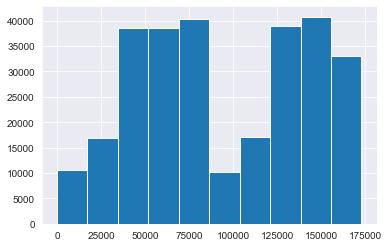

In [37]:
plt.hist(data['Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25562c87e08>,
 'caps': [<matplotlib.lines.Line2D at 0x255627f7dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25562c87248>],
 'medians': [<matplotlib.lines.Line2D at 0x255627a9d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x255627a9e48>],
 'means': []}

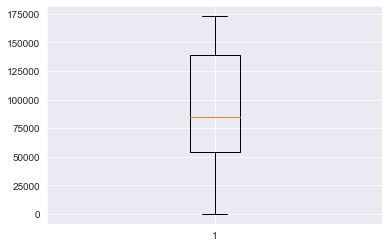

In [38]:
plt.boxplot(data['Time'])

In [39]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [40]:
print("Amount details of fraudulent transaction")
Fraud.Amount.describe()

Amount details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [41]:
print("details of valid transaction")
Valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Correlation matrix

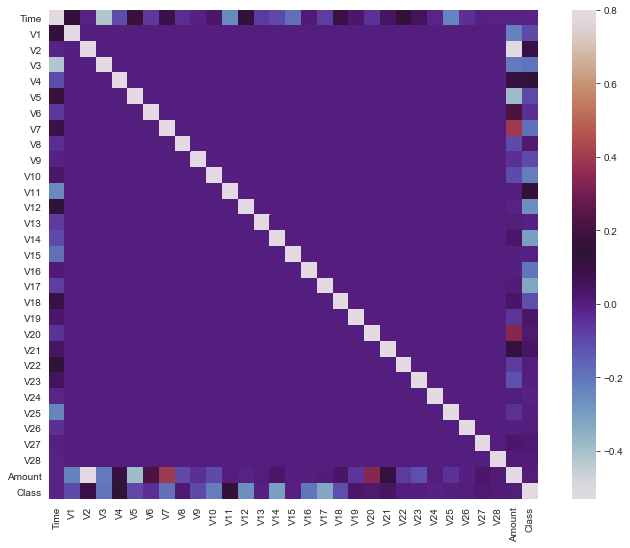

In [42]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True,cmap="twilight")
plt.show()

# For Original Data frame

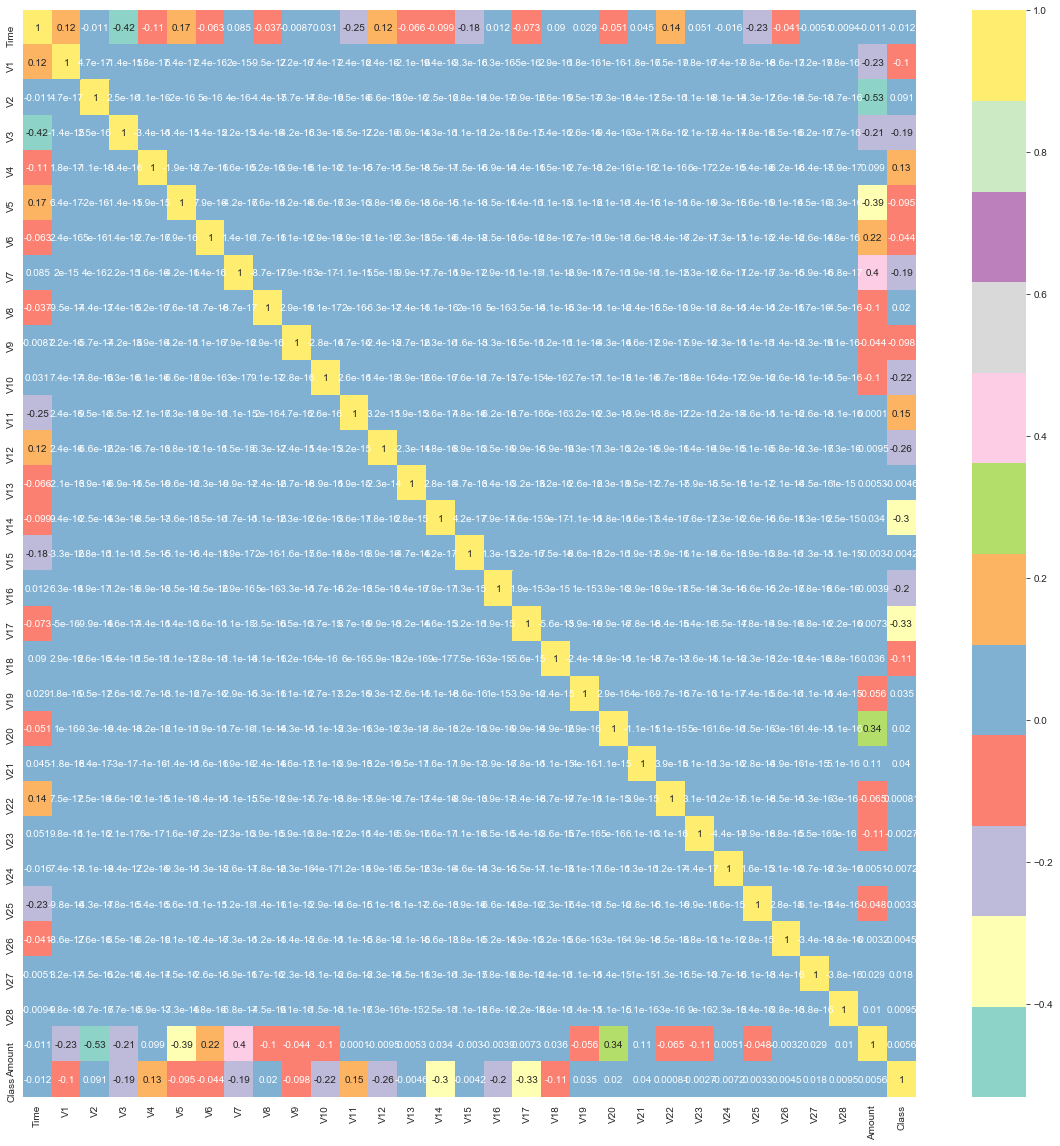

In [43]:
plt.figure(figsize=(20,20))

sns.heatmap(corrmat,annot=True,cmap='Set3')

### Dataset is highly imbalanced, only 0.17 % obseravations are detected as Fraud

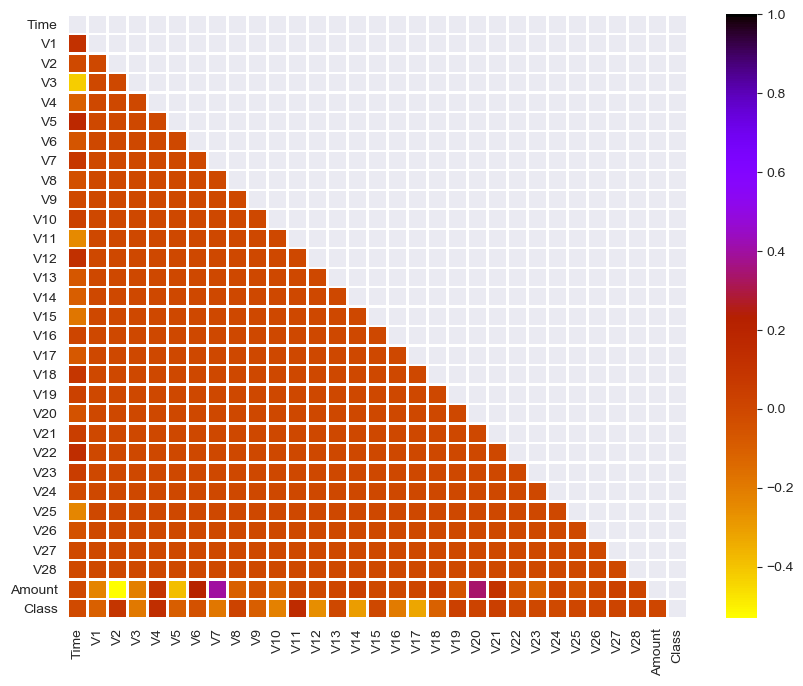

In [44]:
mask = np.triu(np.ones_like(data.corr(),dtype=bool))
plt.figure(dpi=100,figsize=(10,8))
sns.heatmap(data.corr(),yticklabels=True,mask=mask,cmap='gnuplot_r',annot=False, lw=1)
plt.show()

In [45]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [46]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [47]:
#dividing the X and the Y from the dataset
X=data.drop(["Class"], axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(284807, 30)
(284807,)


In [48]:
X_data

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

## Decision Tree 

In [49]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [50]:
X_train.shape

(227845, 30)

In [51]:
X_test.shape

(56962, 30)

#### Isolation Forest Classifier

In [52]:
#Building another model/classifier ISOLATION FOREST
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),
                    contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)

In [53]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
from sklearn.model_selection import RandomizedSearchCV
classifier=DecisionTreeClassifier(criterion='entropy',random_state=5)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [56]:
y_pred=classifier.predict(X_test)

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
print (roc_auc_score( Y_test, y_pred))

0.8773311976732168


In [59]:
#performing random search
params={"max_depth":[3,None],"min_samples_leaf":[1,9],"criterion":["gini","entropy"]}

In [60]:
tree=DecisionTreeClassifier()

In [61]:
tree_cv=RandomizedSearchCV(tree,params,cv=5)

In [62]:
tree_cv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [63]:
print("tuned tree params:{}".format(tree_cv.best_params_))
print("best score is:{}".format(tree_cv.best_score_))

tuned tree params:{'min_samples_leaf': 9, 'max_depth': None, 'criterion': 'entropy'}
best score is:0.999407491935307


In [64]:
y_pred=tree_cv.predict(X_test)

In [65]:
print (roc_auc_score( Y_test, y_pred))

0.9030084670334088


In [66]:
from sklearn.metrics import confusion_matrix

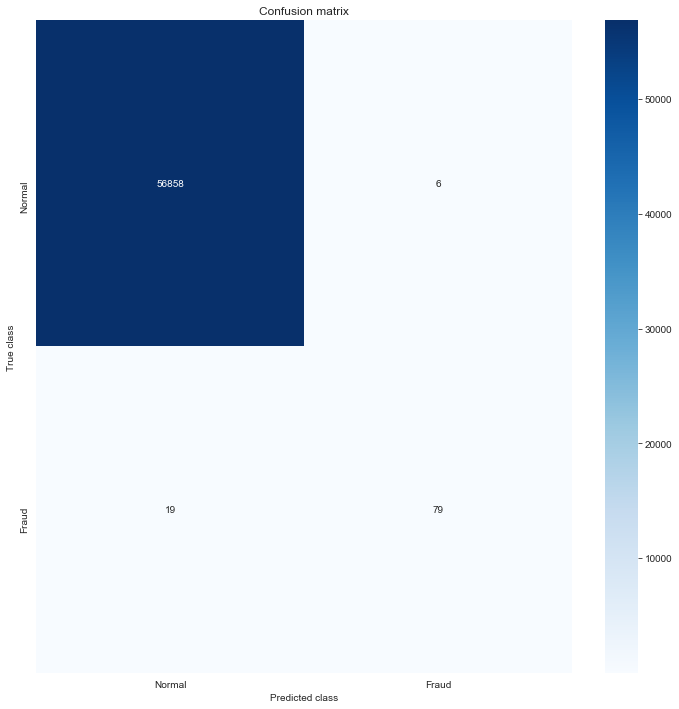

In [67]:
#printing the confusion matrix
LABELS = ["Normal", 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [68]:
#evaluation of the model
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import precision_score,matthews_corrcoef,classification_report
from sklearn.metrics import recall_score, f1_score,accuracy_score
n_outliers = len(Fraud)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

the Model used is Isolation Forest
The accuracy is 0.9995611109160493
The precision is 0.9294117647058824
The recall is 0.8061224489795918
The F1-Score is 0.8633879781420767
The Matthews correlation coefficient is0.8653625643290579


In [69]:
print('{}: {}'.format("Isolation Forest", n_errors))
print(classification_report(Y_test, y_pred))

Isolation Forest: 120
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



#### Random Forest Classifier

In [70]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

In [71]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is0.8690748763736589


In [72]:
print('{}: {}'.format("Random Forest", n_errors))
print(classification_report(Y_test, y_pred))

Random Forest: 24
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



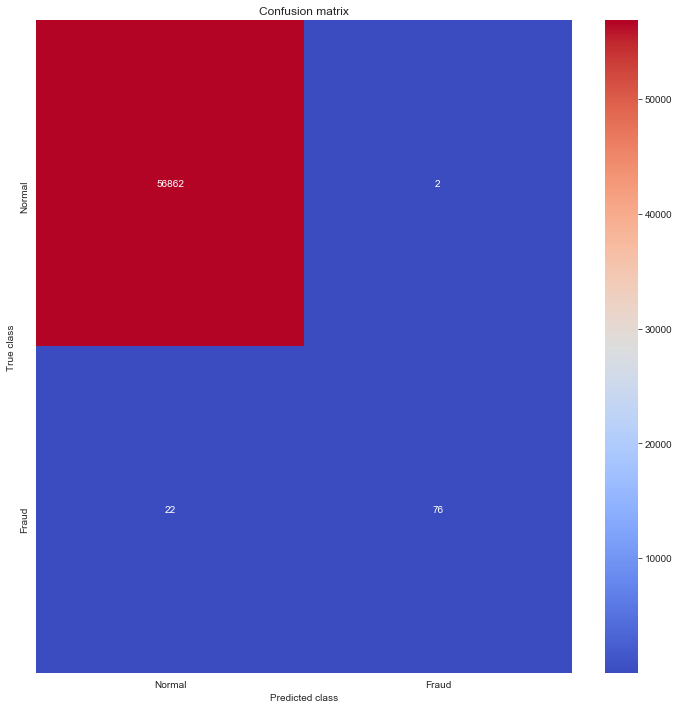

In [73]:
#printing the confusion matrix
LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="coolwarm");
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel('Predicted class')
plt.show()

### Visualizing the Random Tree 

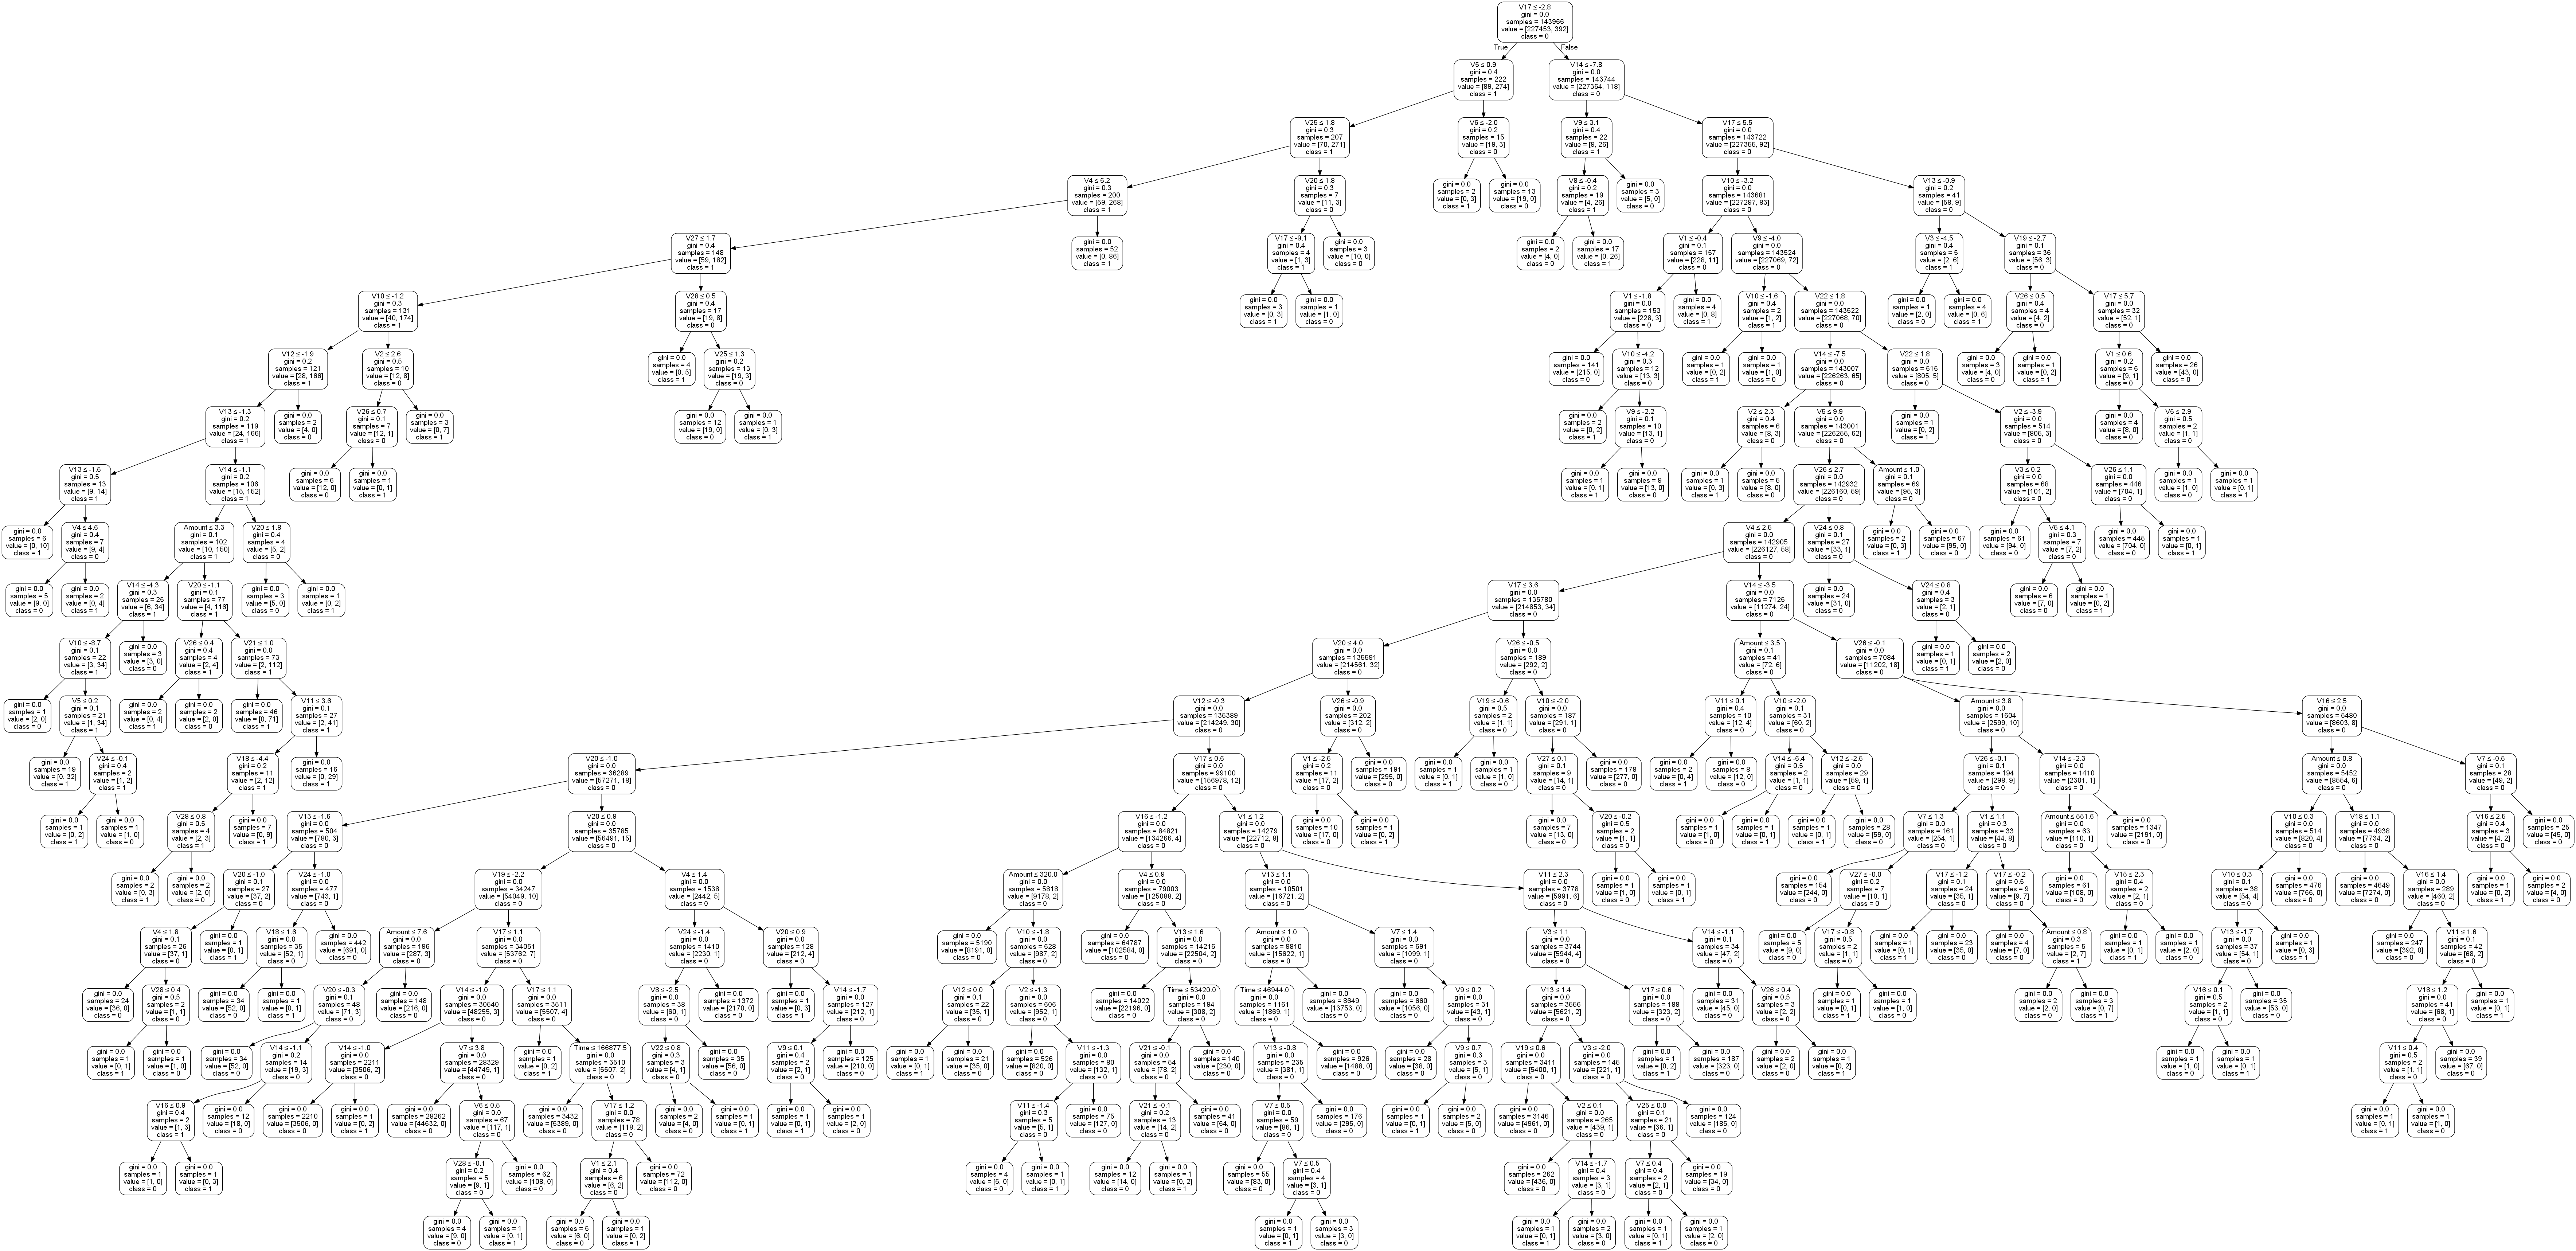

In [74]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = "tree.dot", feature_names = feature_list, 
               rounded = True, precision = 1,
               class_names=['0','1'],
               special_characters=True)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

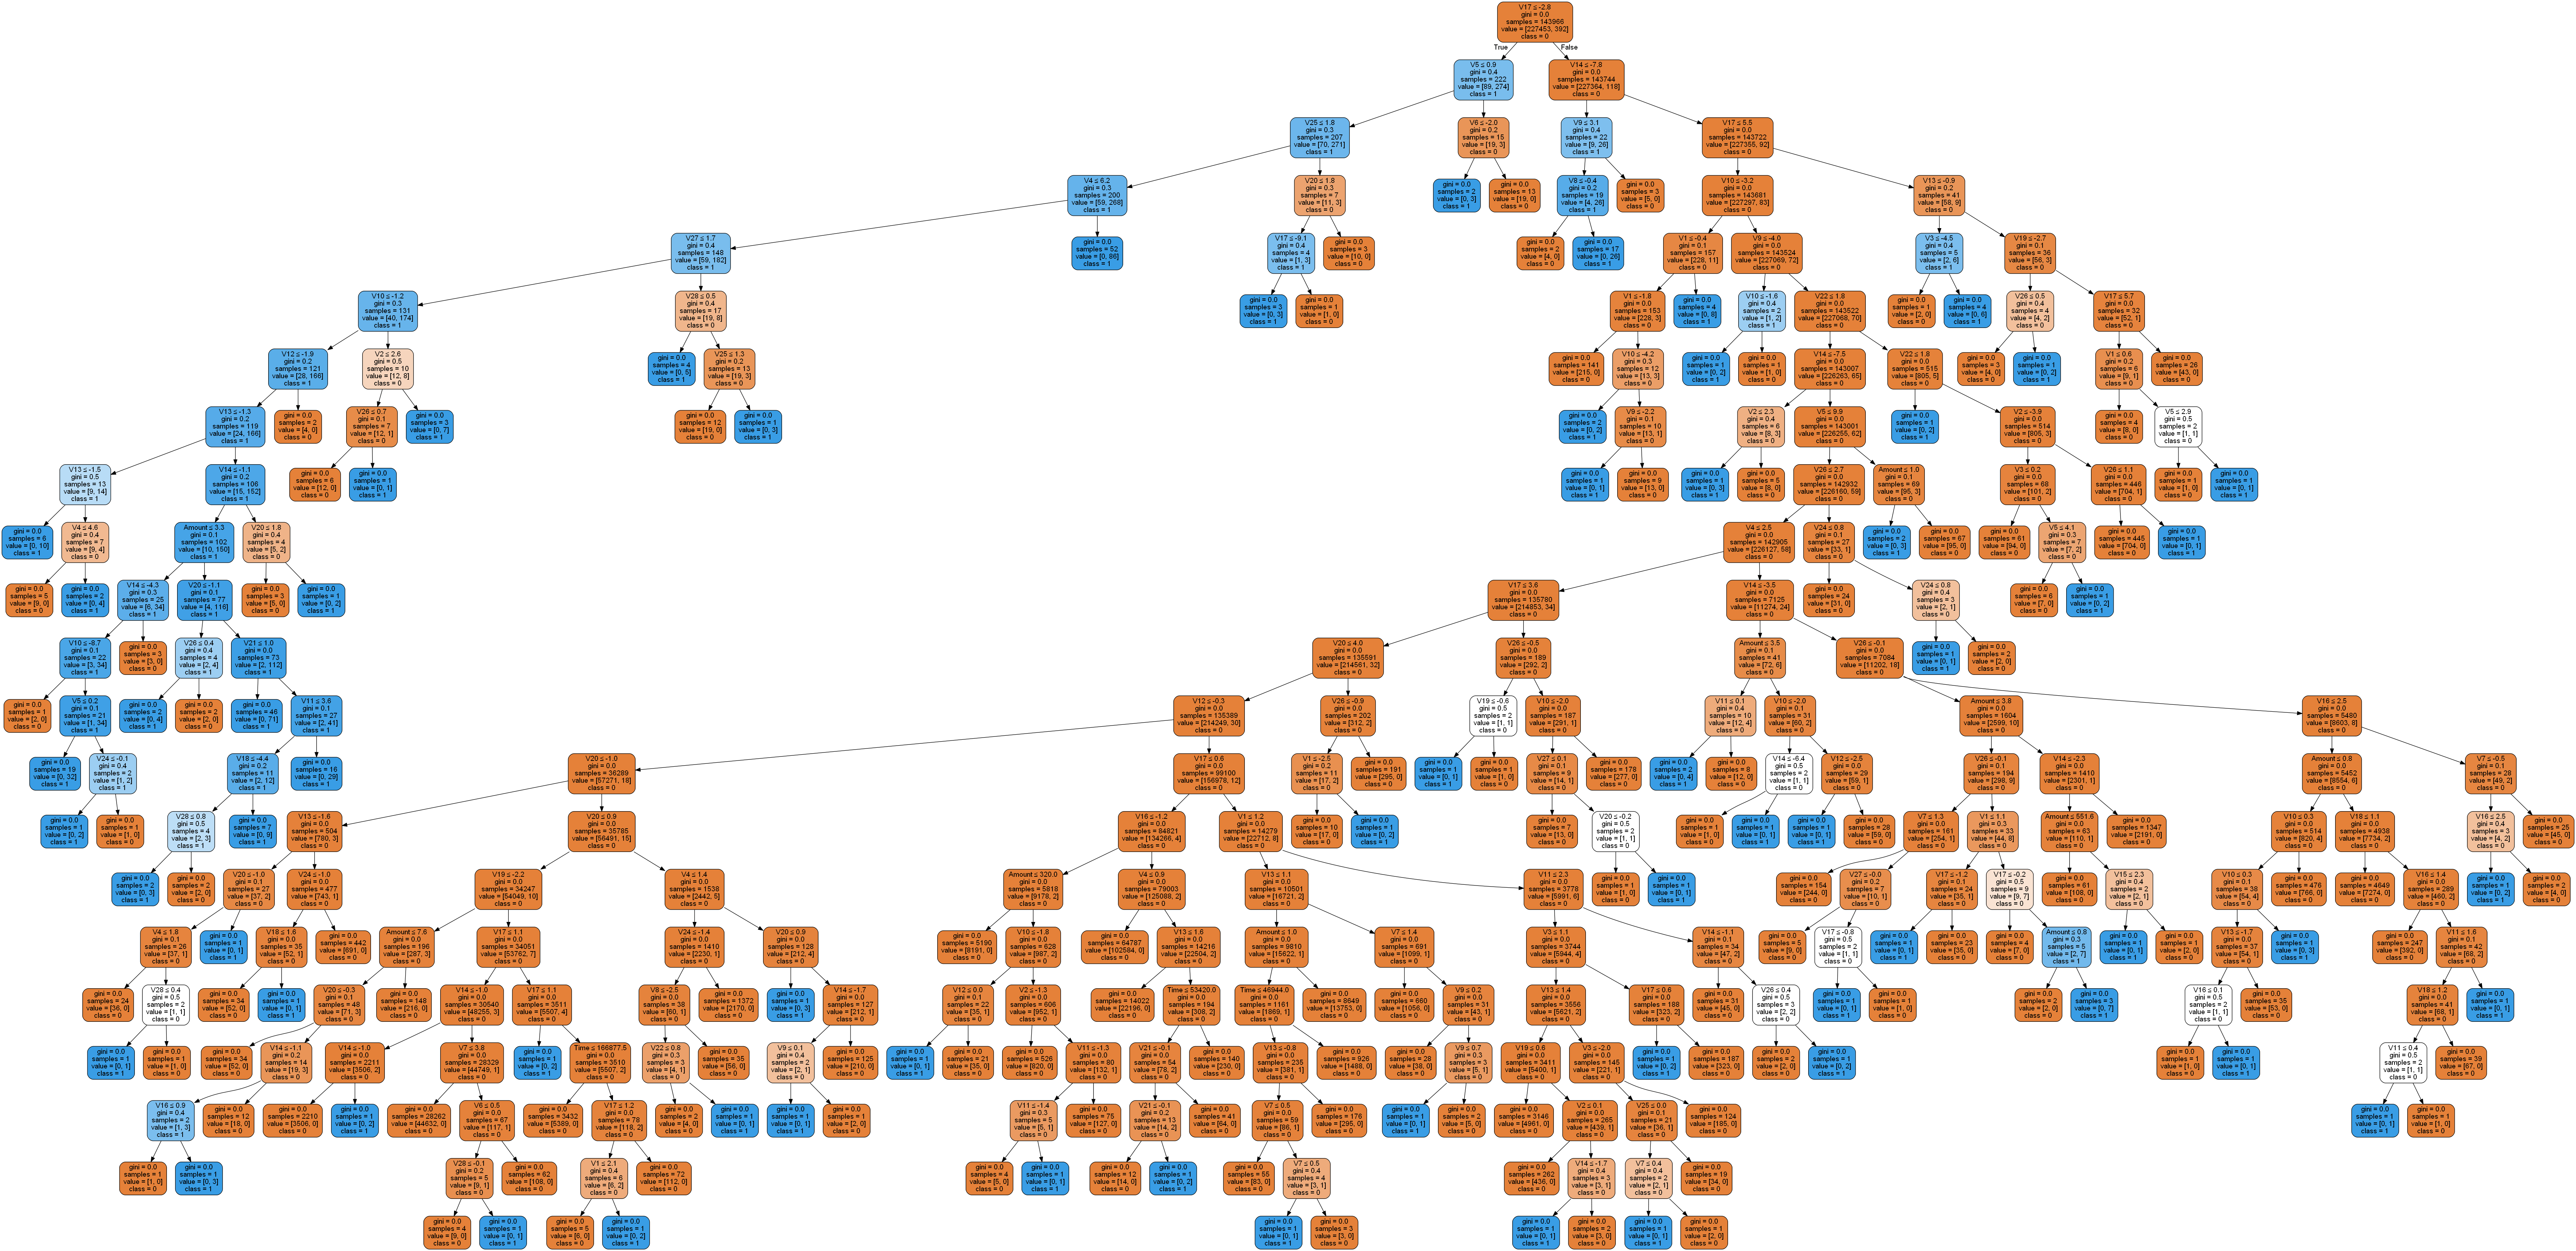

In [75]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = "tree.dot", feature_names = feature_list, 
               rounded = True, precision = 1,
               class_names=['0','1'],
               special_characters=True,
               filled=True)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

# Logistic Regression

In [76]:
features = data.columns[0:30]
outcome = 'Class'
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=5)

In [80]:
lm=LogisticRegression()

In [81]:
lm.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
ypred=lm.predict(xtest)

In [83]:
#AUC is not always area under the curve of a ROC curve. Area Under the Curve is an (abstract) area under some curve, so it is a more general thing than AUROC. With imbalanced classes, it may be better to find AUC for a precision-recall curve.
from sklearn.metrics import roc_curve, auc, roc_auc_score,classification_report,accuracy_score
print (roc_auc_score( ytest, ypred))

0.7979977785414136


In [84]:
print("Train Set Accuracy is ==> ",accuracy_score(ytrain,lm.predict(xtrain)))
print("Test Set Accuracy is ==> ",accuracy_score(ytest,ypred))

Train Set Accuracy is ==>  0.9992056002984485
Test Set Accuracy is ==>  0.9991046662687406


In [85]:
print("Classification Report on Hold Out Dataset==>\n\n",classification_report(ytest,ypred))

Classification Report on Hold Out Dataset==>

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.87      0.60      0.71       104

    accuracy                           1.00     56962
   macro avg       0.94      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [86]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, ypred)
print (auc(false_positive_rate, true_positive_rate))

0.7979977785414136


In [87]:
# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = lm.predict_proba(X_test)
roc_auc = roc_auc_score(ytest, probs[:, 1])
print('ROC AUC Score:',roc_auc)

ROC AUC Score: 0.49836891229703145


In [88]:
# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



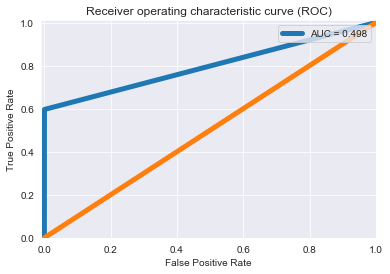

In [89]:
# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Train/Test Split

In [90]:
X = data.drop(labels='Class', axis=1) # Features
y = data.loc[:,'Class']               # Response
del data                              # Delete the original data


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
del X, y

In [93]:
X_train.shape

(227845, 30)

In [94]:
X_test.shape

(56962, 30)

In [95]:
X_train.is_copy = False
X_test.is_copy = False

# Exploratory Data Analysis 

# Time

In [96]:
X_train['Time'].describe()

count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [97]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

In [98]:
X_train['Time'].max() / 24

1.9999074074074075

Text(0.5, 1.0, 'Transaction Times')

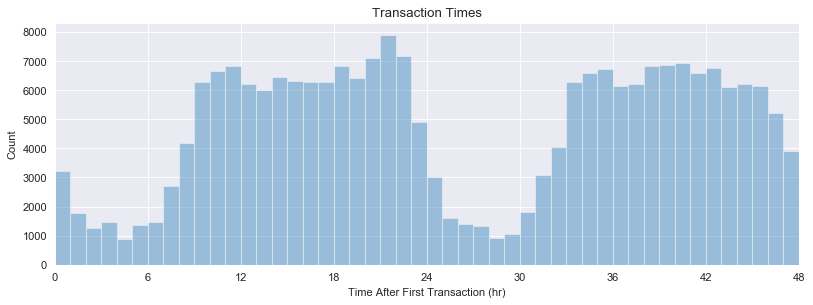

In [99]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

# Amount

In [100]:
X_train['Amount'].describe()

count    227845.000000
mean         88.709296
std         250.026305
min           0.000000
25%           5.550000
50%          22.000000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

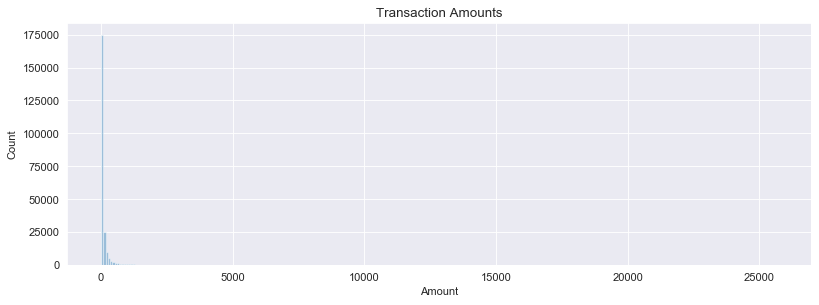

In [101]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

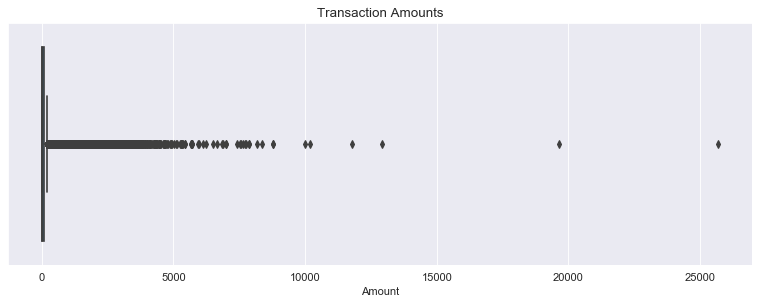

In [102]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

In [103]:
X_train['Amount'].skew()

16.910303546516744

In [104]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9 # Shift all amounts by 1e-9

In [105]:
import scipy as sp
from scipy import stats

X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = stats.boxcox(X_train['Amount'], alpha=0.01)

In [106]:
maxlog

0.1343656979074871

In [107]:
(min_ci, max_ci)

(0.13291390124731134, 0.1358266545085327)

Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

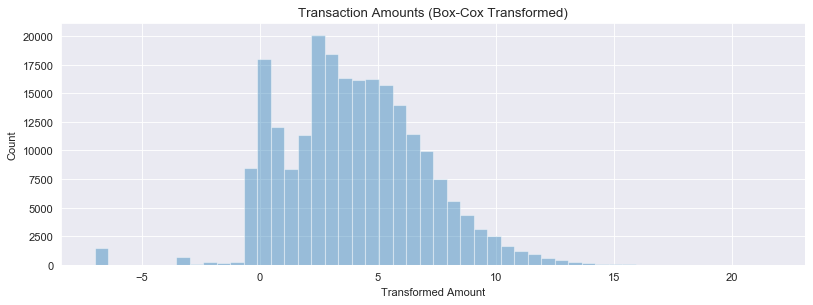

In [108]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [109]:
X_train['Amount'].describe()

count    227845.000000
mean          3.985515
std           2.972505
min          -6.982733
25%           1.927181
50%           3.831861
75%           5.919328
max          21.680567
Name: Amount, dtype: float64

In [110]:
X_train['Amount'].skew()

0.11421488033443958

In [111]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9


In [112]:
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], 
                                         lmbda=maxlog)

# Time vs. Amount

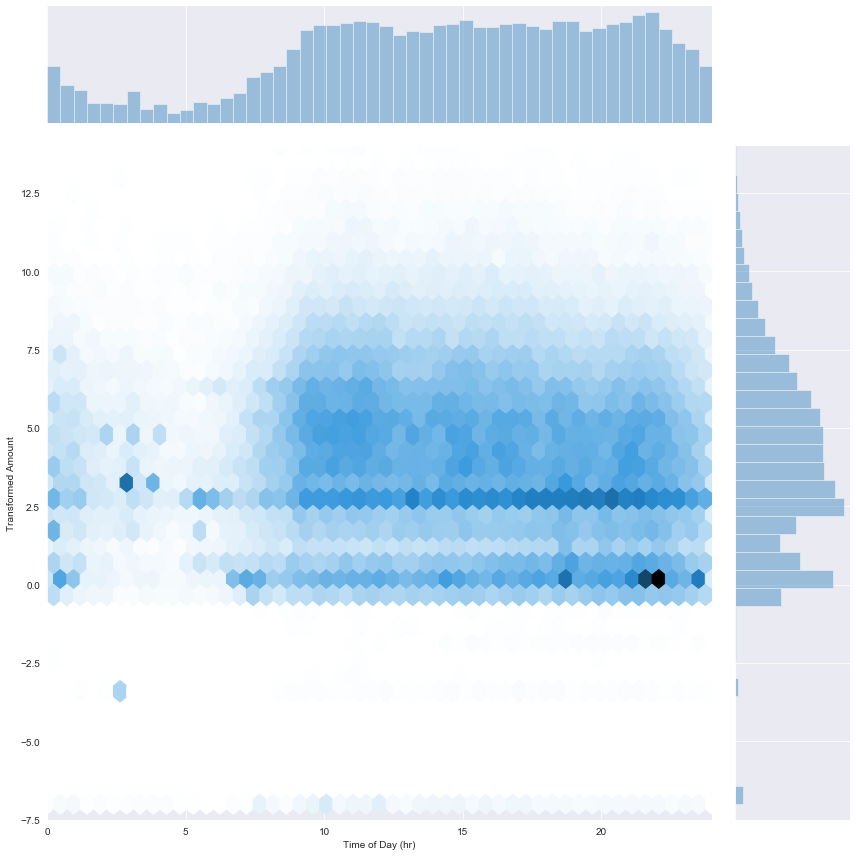

In [113]:
sns.jointplot(X_train['Time'].apply(lambda x: x % 24),
              X_train['Amount'], kind='hex', stat_func=None, 
              size=12, xlim=(0,24), 
              ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')

# V1-V28

In [114]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [115]:
X_train[pca_vars].describe()

V1             V2             V3             V4  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.000713      -0.001034       0.002557       0.003839   
std         1.952399       1.636689       1.514288       1.417086   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.922830      -0.599928      -0.887861      -0.844052   
50%         0.016743       0.064370       0.180865      -0.016750   
75%         1.315147       0.801738       1.027592       0.746907   
max         2.451888      22.057729       9.382558      16.715537   

                  V5             V6             V7             V8  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.002857       0.002085       0.000022       0.000093   
std         1.383532       1.333769       1.240239       1.200348   
min      -113.743307     -26.160506     -43.557242     -73.216718   
25%        -0.693702      -0.766195      -0.555377      -0.208302   
50%        -0.055388      -0.271706       0.039185       0.022594   
75%         0.611056       0.401204       0.569307       0.328079   
max        34.801666      73.301626     120.589494      20.007208   

                  V9            V10  ...            V19            V20  \
count  227845.000000  227845.000000  ...  227845.000000  227845.000000   
mean        0.000243      -0.000363  ...      -0.000146      -0.000796   
std         1.096453       1.082580  ...       0.815140       0.767956   
min       -13.434066     -24.588262  ...      -7.213527     -54.497720   
25%        -0.642006      -0.535079  ...      -0.456946      -0.212129   
50%        -0.051224      -0.091877  ...       0.004371      -0.062809   
75%         0.596563       0.455577  ...       0.459695       0.132873   
max        15.594995      23.745136  ...       5.591971      39.420904   

                 V21            V22            V23            V24  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean        0.000023       0.000897       0.000765      -0.000380   
std         0.733325       0.725353       0.616772       0.605741   
min       -34.830382     -10.933144     -36.666000      -2.836627   
25%        -0.227952      -0.541079      -0.162242      -0.354208   
50%        -0.029095       0.007661      -0.011184       0.040977   
75%         0.186678       0.529342       0.147825       0.438432   
max        27.202839      10.503090      22.083545       4.584549   

                 V25            V26            V27            V28  
count  227845.000000  227845.000000  227845.000000  227845.000000  
mean        0.000136      -0.000301      -0.000046      -0.000027  
std         0.522184       0.482187       0.405182       0.331048  
min        -8.696627      -2.534330     -22.565679     -15.430084  
25%        -0.317488      -0.327576      -0.070767      -0.053013  
50%         0.017081      -0.052599       0.001373       0.011255  
75%         0.351400       0.240554       0.091028       0.078341  
max         7.519589       3.517346      31.612198      33.847808  

[8 rows x 28 columns]

Text(0.5, 1.0, 'V1-V28 Means')

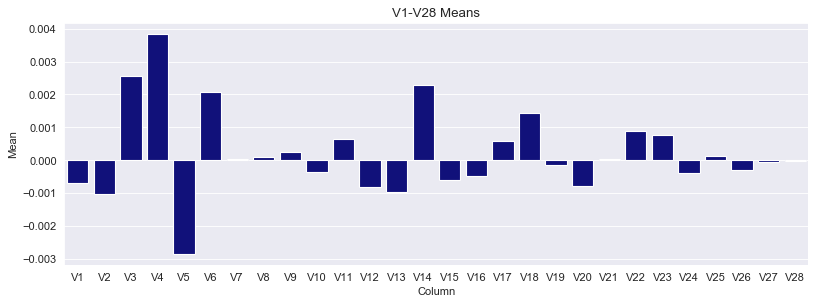

In [116]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), 
            color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5, 1.0, 'V1-V28 Standard Deviations')

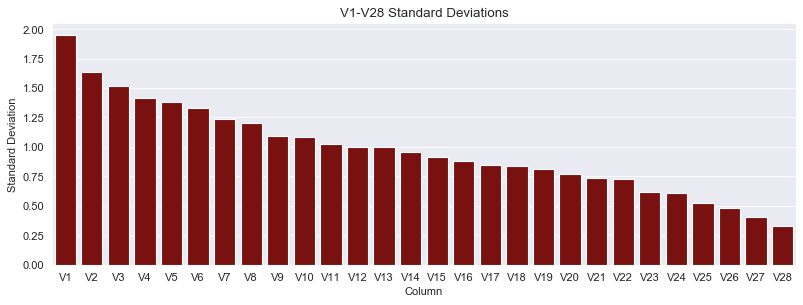

In [117]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(),
            color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')

Text(0.5, 1.0, 'V1-V28 Skewnesses')

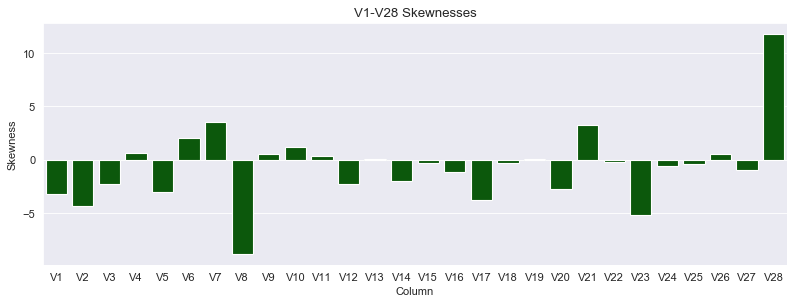

In [118]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')

Text(0.5, 1.0, 'V8')

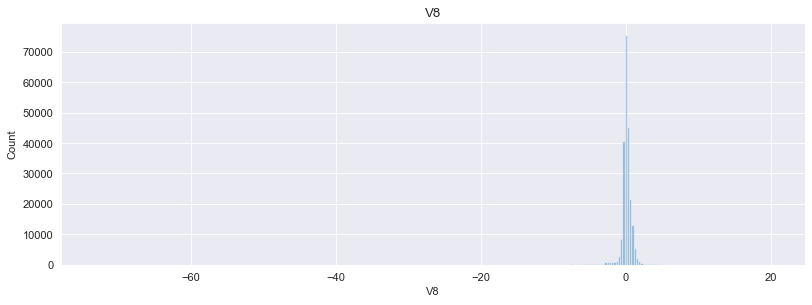

In [119]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['V8'], bins=300, 
             kde=False)
plt.ylabel('Count')
plt.title('V8')

Text(0.5, 1.0, 'V8')

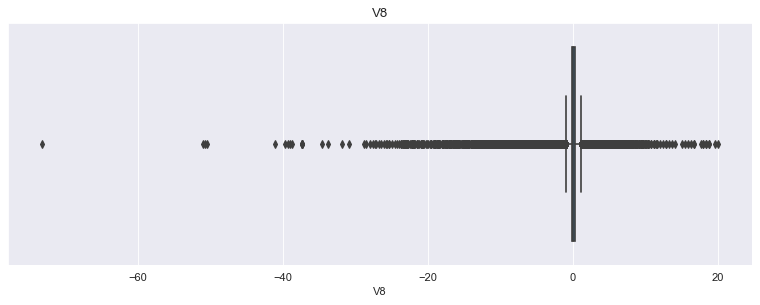

In [121]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

Text(0.5, 1.0, 'V1-V28 Medians')

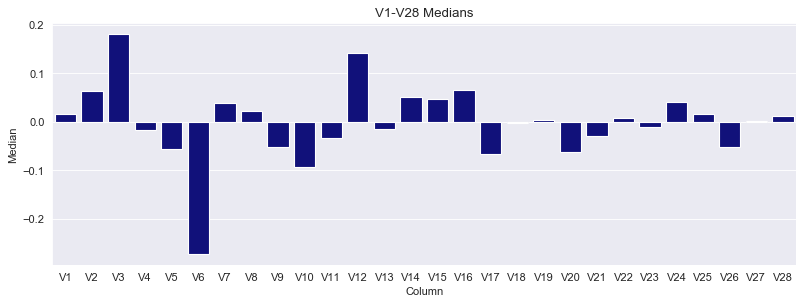

In [122]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')

Text(0.5, 1.0, 'V1-V28 IQRs')

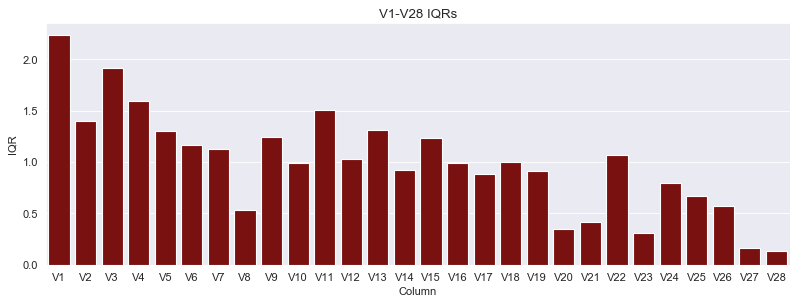

In [123]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')